In [170]:

#Cleaning the data 

import json
import pandas as pd
from glob import glob
import ast
import math
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
def convert(x):
    ob = json.loads(x)
    for k, v in ob.items():
        if isinstance(v, list):
            ob[k] = ','.join(v)
        elif isinstance(v, dict):
            for kk, vv in v.items():
                ob['%s_%s' % (k, kk)] = vv
            del ob[k]
    return ob
  
def f(x,attr):
    if(isinstance(x[attr], str)):
        return pd.Series(ast.literal_eval(x[attr]))
    else:
        return float('NaN')
            

df2=pd.read_csv("C:/Users/cheukkin.Warwick/Desktop/dm_group/final_group_project/Kane Wu/edinburgh.csv",header=0)
df2=df2.set_index(df2.ix[:,0])
df2.drop(df2.columns[0], axis=1,inplace=True)
df3=pd.DataFrame()
df3["business_id"]=df2["business_id"]
attributes_cols=[col for col in df2.columns if 'attributes' in col]
df3=pd.concat([df3, df2.apply(lambda x: f(x,"attributes_Ambience"),axis=1)], axis=1)
df3=pd.concat([df3, df2.apply(lambda x: f(x,"attributes_Dietary Restrictions"),axis=1)], axis=1)
df3=pd.concat([df3, df2.apply(lambda x: f(x,"attributes_Good For"),axis=1)], axis=1)
df3=pd.concat([df3, df2.apply(lambda x: f(x,"attributes_Music"),axis=1)], axis=1)
df3=pd.concat([df3, df2.apply(lambda x: f(x,"attributes_Parking"),axis=1)], axis=1)
df3=pd.concat([df3,pd.get_dummies(df2.attributes_Alcohol)], axis=1)
df3=pd.concat([df3,pd.get_dummies(df2["attributes_Ages Allowed"])], axis=1)
df3=pd.concat([df3,pd.get_dummies(df2.attributes_Attire)], axis=1)
df3=pd.concat([df3,pd.get_dummies(df2["attributes_Price Range"])], axis=1)
df3['attributes_BYOB/Corkage_TF']=df2["attributes_BYOB/Corkage"]=="yes_free"
df3=pd.concat([df3,pd.get_dummies(df2["attributes_Noise Level"])], axis=1)
df3 = df3.drop(0, 1)
#df3['attributes_Noise Level_scaled']=df2['attributes_Noise Level'].replace(to_replace="quiet",value=1)
#df3['attributes_Noise Level_scaled']=df3['attributes_Noise Level_scaled'].replace(to_replace="average",value=2)
#df3['attributes_Noise Level_scaled']=df3['attributes_Noise Level_scaled'].replace(to_replace="loud",value=3)
#df3['attributes_Noise Level_scaled']=df3['attributes_Noise Level_scaled'].replace(to_replace="very_loud",value=4)
df3['attributes_Smoking_NO']=df2['attributes_Smoking']=="NO"
df3['attributes_Smoking_OUTDOOR']=df2['attributes_Smoking']=="outdoor"
df3['attributes_By Appointment Only']=df2['attributes_By Appointment Only']
df3['attributes_Caters']=df2['attributes_Caters']
df3['attributes_Coat Check']=df2['attributes_Coat Check']
df3['attributes_Caters']=df2['attributes_Caters']
df3['attributes_Drive-Thru']=df2['attributes_Drive-Thru']
df3['attributes_Good For Dancing']=df2['attributes_Good For Dancing']
df3['attributes_Good For Groups']=df2['attributes_Good For Groups']
df3['attributes_Good for Kids']=df2['attributes_Good for Kids']
df3['attributes_Good for Kids']=df2['attributes_Good for Kids']
df3['attributes_Happy Hour']=df2['attributes_Happy Hour']
df3['attributes_Has TV']=df2['attributes_Has TV']
df3['attributes_Outdoor Seating']=df2['attributes_Outdoor Seating']
df3['attributes_Has TV']=df2['attributes_Has TV']
df3['attributes_Take-out']=df2['attributes_Take-out']
df3['attributes_Takes Reservations']=df2['attributes_Takes Reservations']
df3['attributes_Waiter Service']=df2['attributes_Waiter Service']
df3['attributes_Wheelchair Accessible']=df2['attributes_Wheelchair Accessible']

df3=df3.fillna(0)
df3=df3.replace(to_replace=False,value=0)
df3=df3.replace(to_replace=True,value=1)

df3["Non-empty"]=(df3!=0).any(1)

df4=pd.read_csv("C:/Users/cheukkin.Warwick/Documents/dm_grp/dm_group/edinburgh.csv")
df4=df4.set_index(df4.ix[:,0])
df4.drop(df4.columns[0], axis=1,inplace=True)
df5=pd.concat([df3,pd.get_dummies(df4.cusine)],axis=1)
df5["Non-empty"]=(df5!=0).any(1)



We have total 1215 restaurants in our dataset with 55 of them having no attributes at all. Amount these 1215 restaurants, we clustered them in to 5 different categories to analyse the location and density of different type restaurants in different regions within the city.

In this part, create new function fancy_dendrogram for simplified dendrogram drawings and also hclst for hierachical clustering.

In [171]:
#To build the functions for clustering
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
    
def hclst(data,method,distance):
    from scipy.cluster.hierarchy import cophenet
    from scipy.spatial.distance import pdist
    Z=linkage(data,method=method,metric=distance)
    c, coph_dists = cophenet(Z , pdist(data,metric=distance))
    # calculate full dendrogram'
    plt.figure(figsize=(25, 10))
    fancy_dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # useful in small plots so annotations don't overlap
    )
    plt.show()
    
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()
    return(Z,c,coph_dists)
    

After considering different distance metrics and linkage, Euclidean distance metric and ward linkage are chosen for their simplicity and better structured dendrogram. 

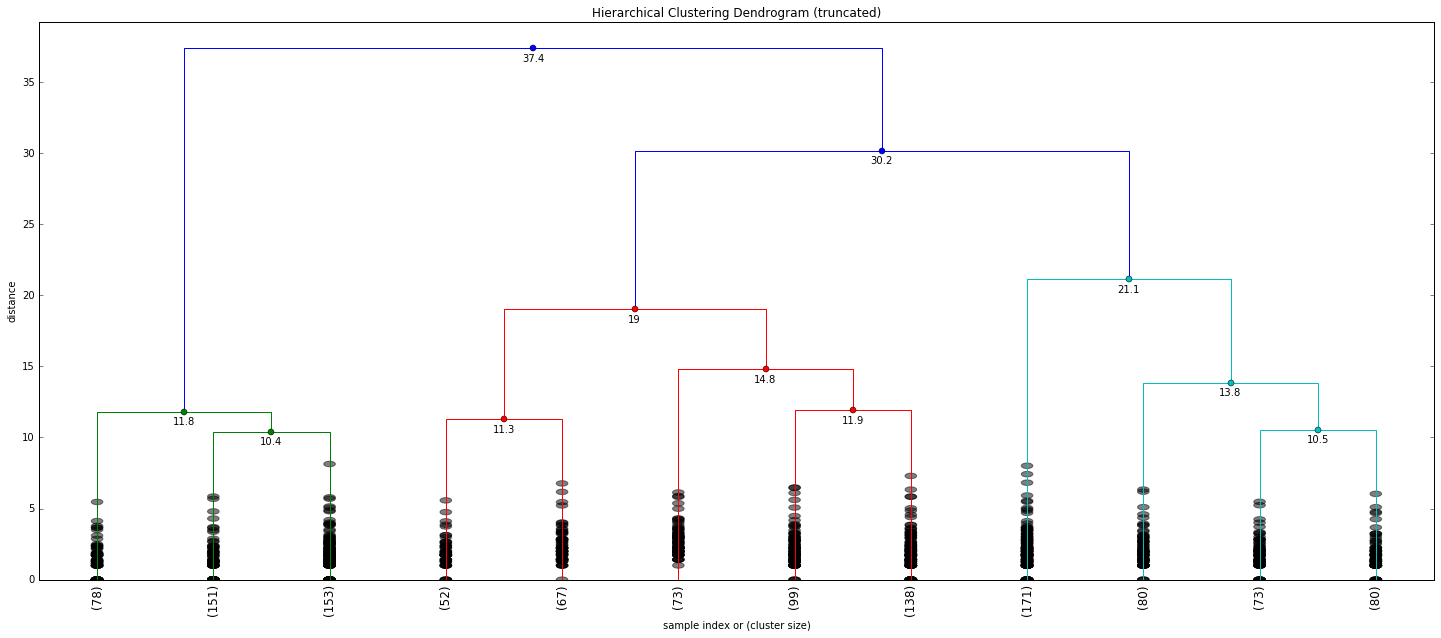

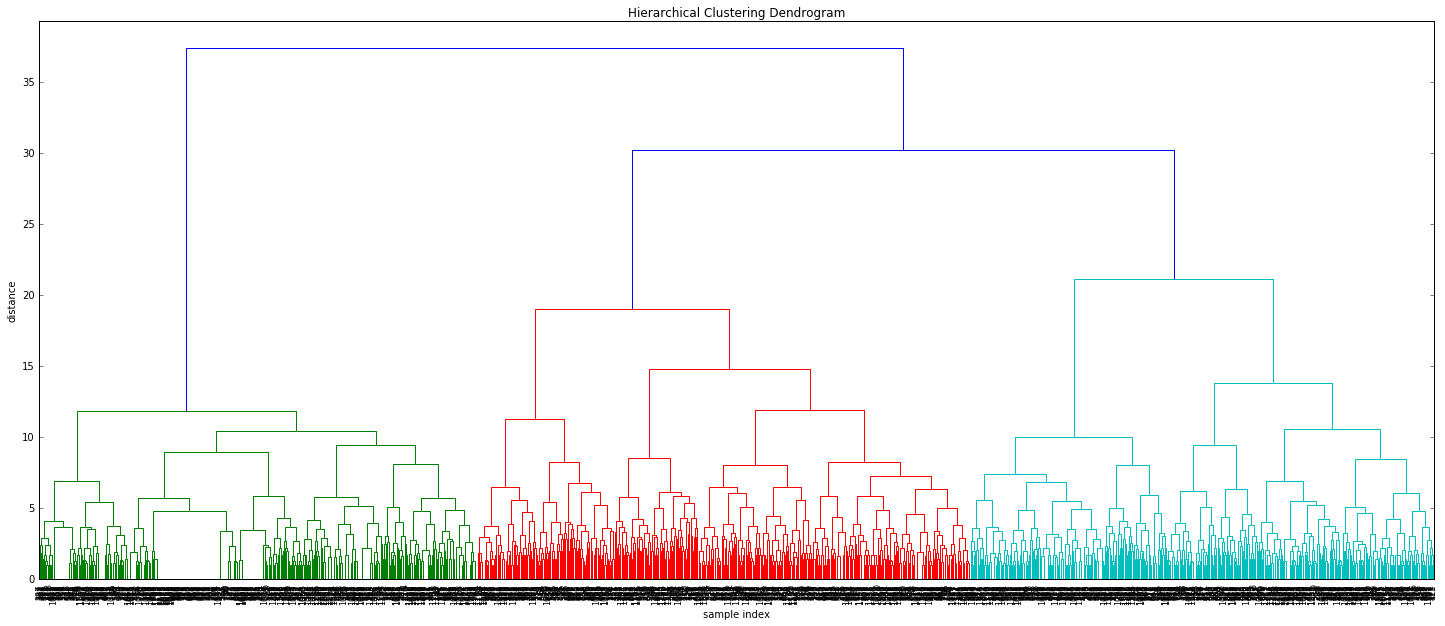

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Good For Dancing,attributes_Good For Groups,attributes_Good for Kids,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31516,aFVO6hoFlOCN8pKsmJbWjw,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
31519,f_adZ5jM1k9uABuleJmGpw,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31521,QXUzUvUp8_sCDzp7f4_ToQ,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
31522,hFm60FnwvZJQXEVeEtUuaw,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31527,yQMRUN3WlbZH-Fq__ubvXw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
31529,L5cQjBQu6qnV_grmvk-drg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,1
31530,tAoUsufHhcTRZEBTwmC68g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31531,QopG-46G0EIeePT8q-4JtQ,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,1,1
31532,8RXIwWR34JunHKd00UU4wA,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,1


In [193]:
#Consider a few different linkage 
df3_filtered=df3.loc[(df3!=0).any(1)]
df3_filtered=df3_filtered.iloc[:,0:58]
R1=hclst(df3_filtered.iloc[:,1:58],"ward","euclidean")
df3_filtered

Now to determine cuts by different measures.

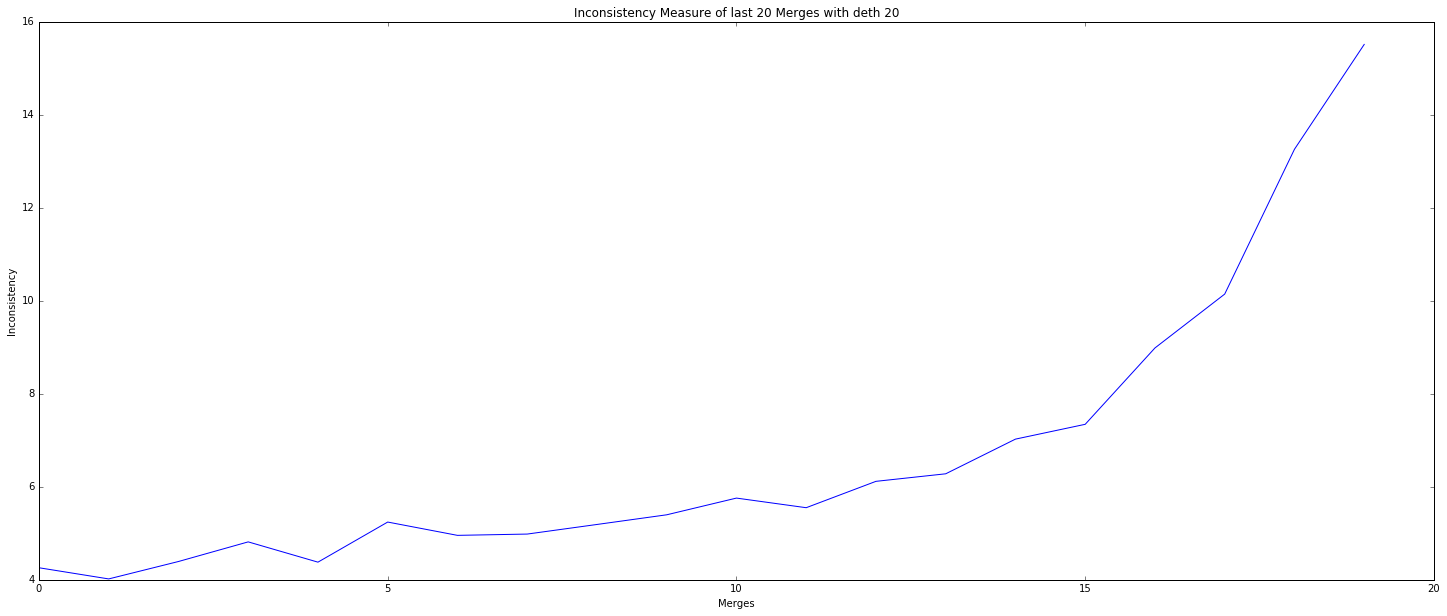

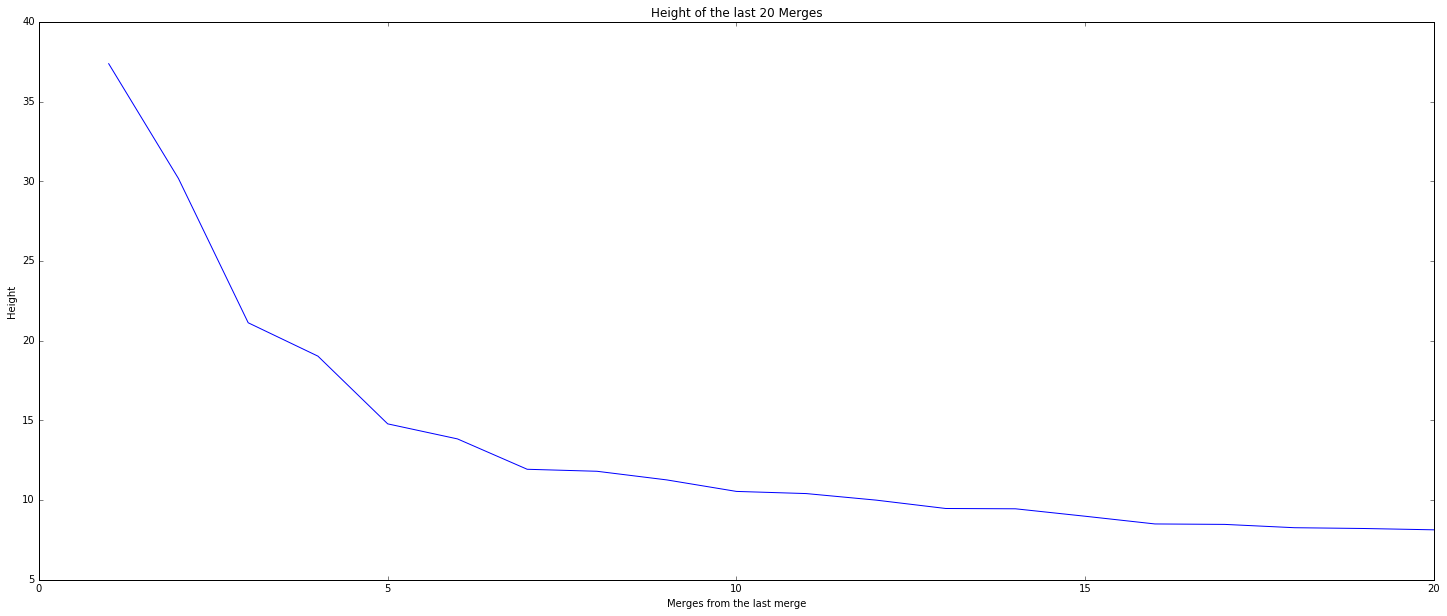

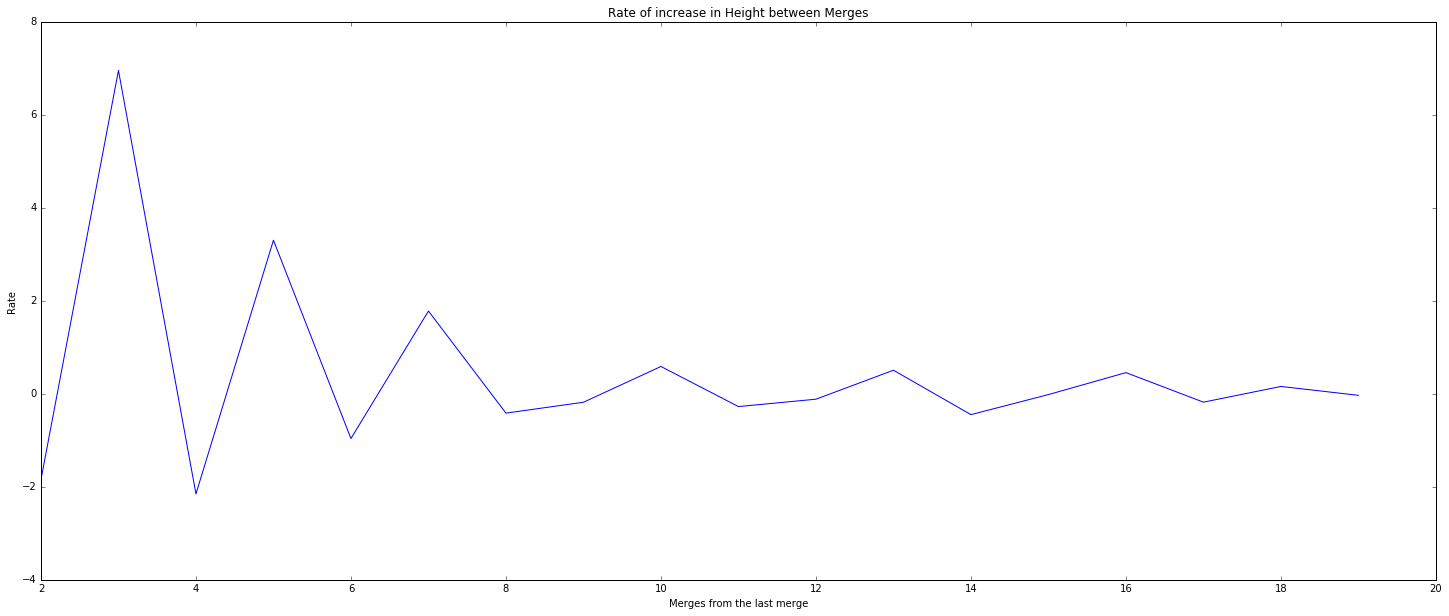

In [194]:
#To determine cuts by different measures
from scipy.cluster.hierarchy import inconsistent
depth = 20
incons1 = inconsistent(R1[0], depth)
incons1[-20:]
plt.figure(figsize=(25, 10))
plt.title('Inconsistency Measure of last 20 Merges with deth ' + str(depth))
plt.xlabel('Merges')
plt.ylabel('Inconsistency')
plt.plot(incons1[-20:,3])
plt.show()
#Determine cuts By Elbow
plt.figure(figsize=(25, 10))
plt.title('Height of the last 20 Merges')
plt.xlabel('Merges from the last merge')
plt.ylabel('Height')
last = R1[0][-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Rate of increase in Height between Merges')
plt.xlabel('Merges from the last merge')
plt.ylabel('Rate')
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()


from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(R1[0], max_d, criterion='distance')
df3_filtered['cluster']=clusters


From the plots, a cut with 5 clusters gives the most desired result.
Now to visualise the results.

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible,cluster,zip,Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31519,f_adZ5jM1k9uABuleJmGpw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,EH1,Classy
31522,hFm60FnwvZJQXEVeEtUuaw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,EH1,Classy
31527,yQMRUN3WlbZH-Fq__ubvXw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,EH3,Classy
31530,tAoUsufHhcTRZEBTwmC68g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,EH3,Classy
31543,-F1ktE7JM6vpIoF16CAyjQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,EH2,Classy
31547,AYobEbZ5JZ3WuEQaQnRXvQ,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,EH1,Classy
31557,Mpn6AsGRp_3q00Mzjt-pVA,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,EH3,Classy
31559,nqZXFkRTH_vsGvOzRVWI8g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,EH8,Classy
31568,VekKmagfcsfq0UOeX_7RPg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,EH6,Classy


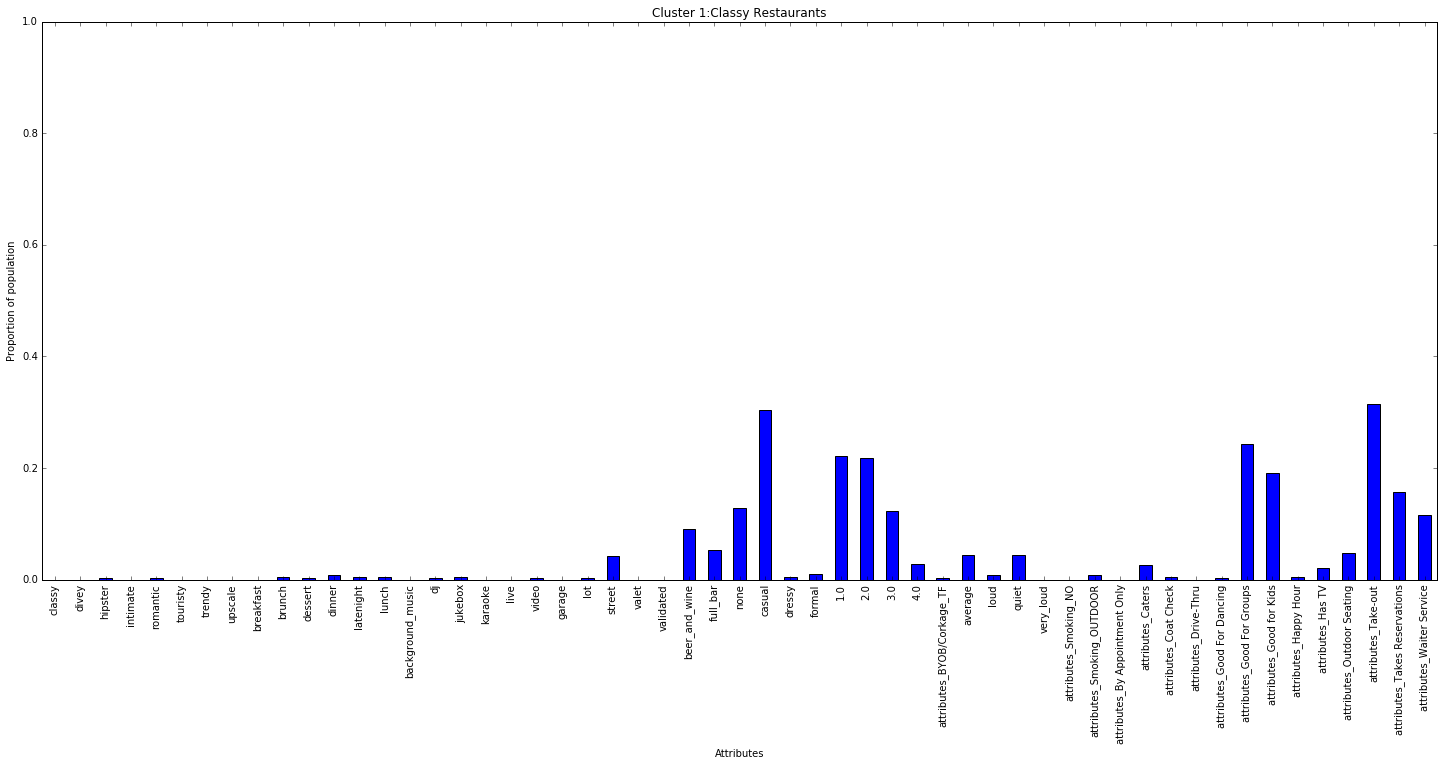

In [208]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(R1[0], max_d, criterion='distance')
df3_filtered['cluster']=clusters

#To visualise results
C1=df3_filtered[df3_filtered.cluster==1]
C1=C1.drop(C1.columns[57], axis=1)
C1=C1.describe()
C2=df3_filtered[df3_filtered.cluster==2]
C2=C2.drop(C2.columns[57], axis=1)
C2=C2.describe()
C3=df3_filtered[df3_filtered.cluster==3]
C3=C3.drop(C3.columns[57], axis=1)
C3=C3.describe()
C4=df3_filtered[df3_filtered.cluster==4]
C4=C4.drop(C4.columns[57], axis=1)
C4=C4.describe()
C5=df3_filtered[df3_filtered.cluster==5]
C5=C5.drop(C5.columns[57], axis=1)
C5=C5.describe()

plt.figure(figsize=(25, 10))
plt.title('Cluster 1:Classy Restaurants')
plt.xlabel('Attributes')
plt.ylabel('Proportion of population')
C1.ix[1,1:56].plot(kind='bar',ylim=[0,1])
df3_filtered[df3_filtered.cluster==1]

Cluster 1 contains 382 restaurants. Most of these restaurants do not provide much information for classification.

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible,cluster,zip,Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31558,r3QvCj1tsgASA90GBU3eVg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,EH3,General
31562,-rwVxBOV0VNXB12of1N6hg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,2,EH1,General
31592,16_M0bA14jGcOE0hLmZK_w,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,EH3,General
31594,9lF6-JrS2PvTkw9KVxn3Yg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,EH1,General
31598,5pA0bK3x-8TWzWzbZRUJew,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,EH1,General
31602,Qey0hC4usZnGb2aP3Q-WpA,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,EH1,General
31604,4dIzmqGAhFIcuHfI8CySig,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,2,EH1,General
31622,R46yVmH-EBfEqFD8vJI1Gw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,EH2,General
31632,gOGshF3w0eParpAPLTyDBA,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,1,0,2,EH2,General


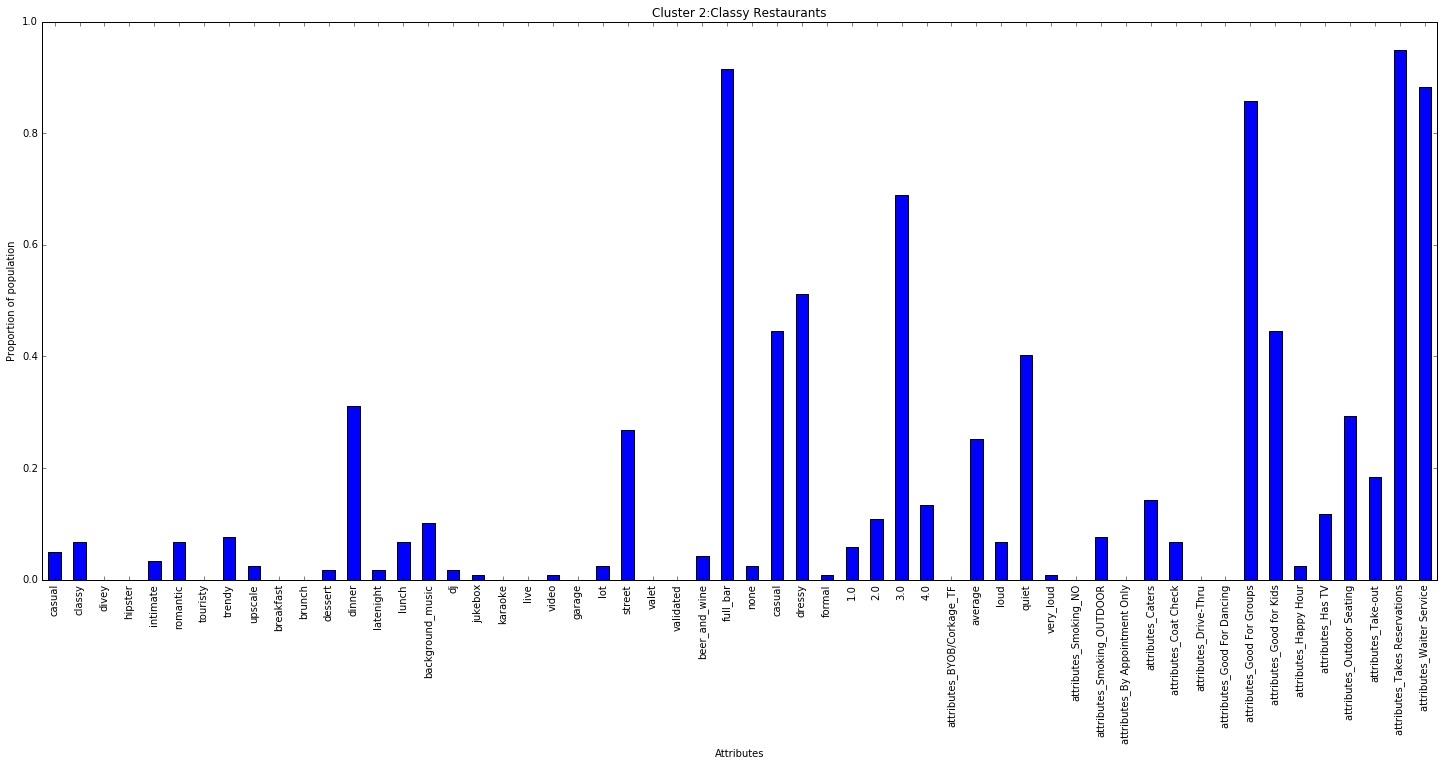

In [214]:
plt.show()
plt.figure(figsize=(25, 10))
plt.title('Cluster 2:Classy Restaurants')
plt.xlabel('Attributes')
plt.ylabel('Proportion of population')
C2.ix[1,0:56].plot(kind='bar',ylim=[0,1])
df3_filtered[df3_filtered.cluster==2]

Cluster 2 contains 119 high class restaurants. They are the most expensive type of restaurants, providing mainly dinner service. 
Most of them require customers to be dressy. They are more the quiet type of restaurants and some of them provide background music.
Those stylish restaurants with classy, romantic, intimate, trendy and upscale atmosphere are mainly in this cluster. 
They are generally good for groups and dating.

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible,cluster,zip,Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31516,aFVO6hoFlOCN8pKsmJbWjw,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,3,EH1,Pubs and Bars
31521,QXUzUvUp8_sCDzp7f4_ToQ,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,3,EH2,Pubs and Bars
31531,QopG-46G0EIeePT8q-4JtQ,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,3,EH1,Pubs and Bars
31539,Nq_BMV7kyx9_C3w0Jip6CA,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,3,EH1,Pubs and Bars
31541,zpsDyx9wh7LYjtBLTpu_-w,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,3,EH2,Pubs and Bars
31544,QPsNlmETw14k-_RqX-RULw,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,1,3,EH1,Pubs and Bars
31546,rkk2gLhqB3P5lwaGeBiDqQ,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,3,EH1,Pubs and Bars
31560,u-JyVztsrx2f9sZKm5FvWQ,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,3,EH2,Pubs and Bars
31575,WN2QUFWxIiTtUgW-oczrQg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,3,EH2,Pubs and Bars


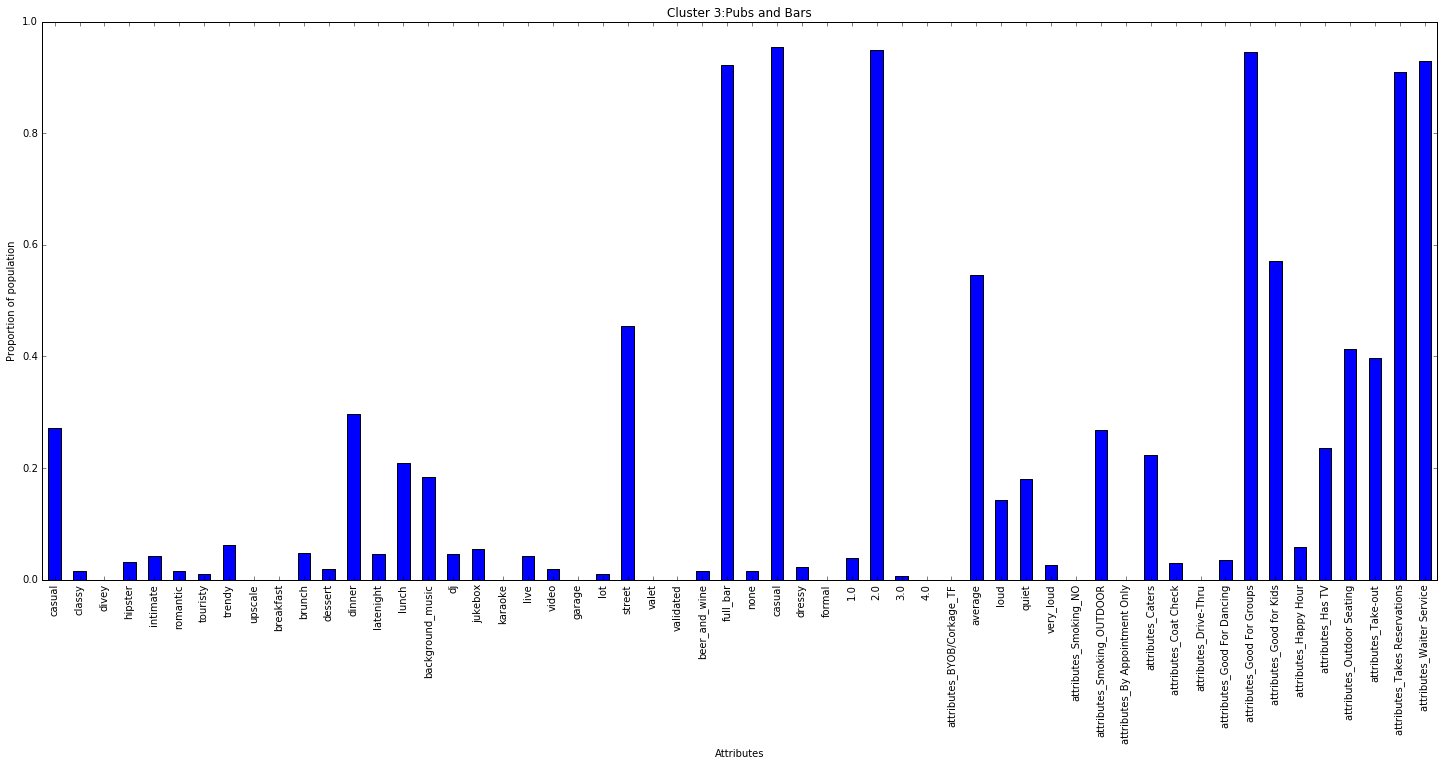

In [211]:
plt.show()
plt.figure(figsize=(25, 10))
plt.title('Cluster 3:Stylish restaurants and Pubs & Bars')
plt.xlabel('Attributes')
plt.ylabel('Proportion of population')
C3.ix[1,0:56].plot(kind='bar',ylim=[0,1])
df3_filtered[df3_filtered.cluster==3]

Cluster 3 contains 310 restaurants. These are more average restaurants including pubs and bars priced at level 2, providing mainly dinner and lunch. 
They are less quiet, few of them can even be loud or very loud. This clusters contain most of the restaurants that provide dj, jukebox, live and video music and also TV boardcast.
Some of these restaurants are quite stylish with lipster, intimate or trendy style.
They are mainly good for groups.

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible,cluster,zip,Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31596,mV2qIJvhYuHTI0_to25nrQ,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,4,EH7,Unknowns
31640,2ftNAAakpz-8nYLkUnx6xQ,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,4,EH1,Unknowns
31657,RhFRNzCcTd48OA2QFDTdBA,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,4,EH8,Unknowns
31685,MZLCr_GGsRJJTmkeKOw0Dw,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,4,EH6,Unknowns
31709,dpJSk5K3gTo42bemPbb6VQ,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,EH6,Unknowns
31732,HzWw0ozt8Ns-SweQNcfCQA,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,4,EH8,Unknowns
31741,mI2EMtr-lZYZQlxuyOg4xg,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,4,EH7,Unknowns
31750,KhIidXoCpQgagTJFgS2yeA,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,4,EH8,Unknowns
31772,0avjCQRA5Z2f_AuzXyILSQ,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,EH8,Unknowns


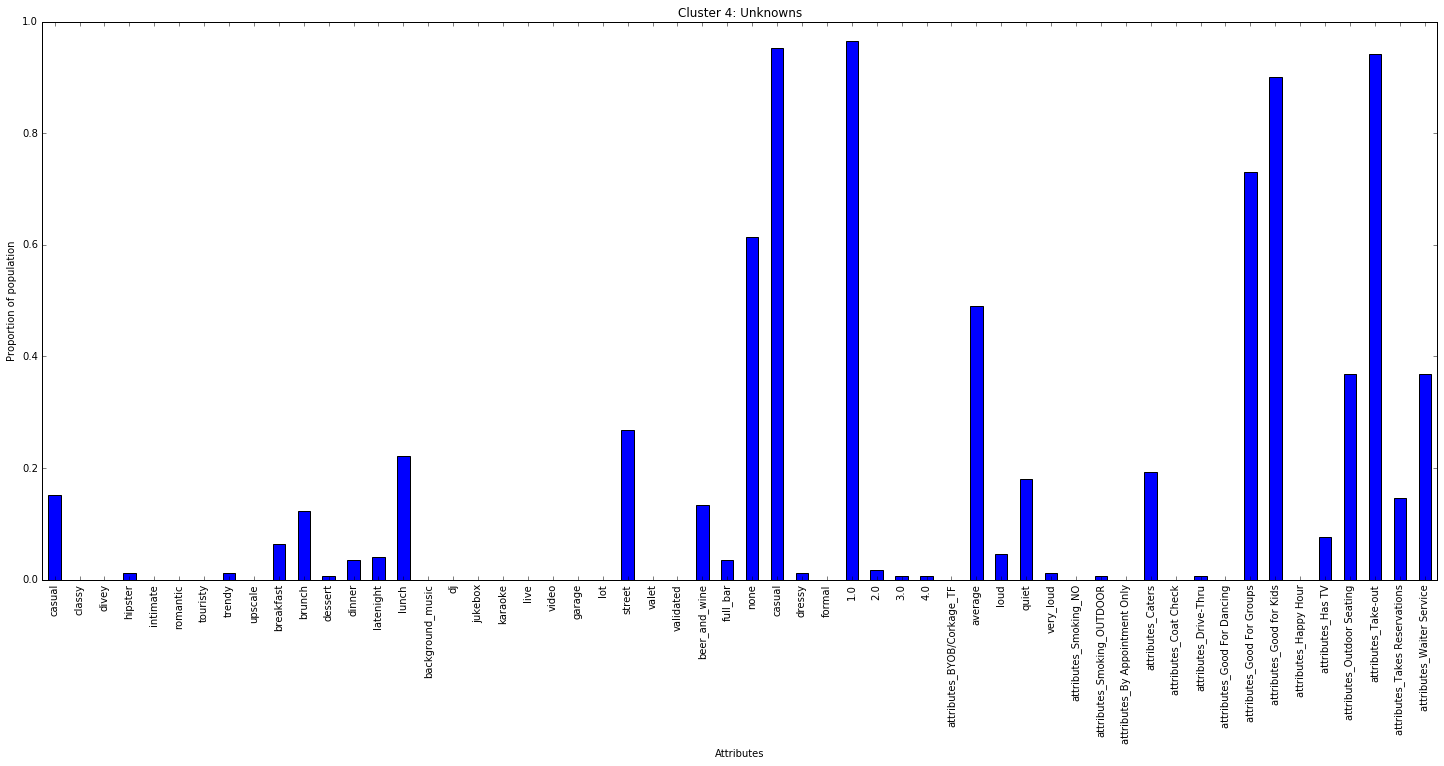

In [212]:
plt.show()
plt.figure(figsize=(25, 10))
plt.title('Cluster 4: Fastfood & Takeaways')
plt.xlabel('Attributes')
plt.ylabel('Proportion of population')
C4.ix[1,0:56].plot(kind='bar',ylim=[0,1])
df3_filtered[df3_filtered.cluster==4]

There are 171 restaurants in cluster 5. These are mainly the cheapest kind of restaurants, probably fastfood restaurants as most of them do not provide waiter service, wine nor having any bars.
Their embience level is quite average.
They are mainly good for kids and also suitable for groups. 

,business_id,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,...,attributes_Happy Hour,attributes_Has TV,attributes_Outdoor Seating,attributes_Take-out,attributes_Takes Reservations,attributes_Waiter Service,attributes_Wheelchair Accessible,cluster,zip,Type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31529,L5cQjBQu6qnV_grmvk-drg,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,5,EH1,Fastfoods and Takeaways
31532,8RXIwWR34JunHKd00UU4wA,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,5,EH1,Fastfoods and Takeaways
31534,tHLEoHBZtjH1G_ONnKwRNg,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5,EH12,Fastfoods and Takeaways
31537,FfCUl9Bqt3QrL0xtkPDQXg,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,5,EH3,Fastfoods and Takeaways
31548,NLjG1EDhI2Aa71ZoLFqbQQ,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,5,EH7,Fastfoods and Takeaways
31566,KSaSzOVyWSo4Ma0UkBd56A,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,5,EH8,Fastfoods and Takeaways
31572,UmOeVhicD3cTepEDC6p4jw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,5,EH8,Fastfoods and Takeaways
31578,IImme8H_HNUNNbPeTQwT_Q,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,5,EH1,Fastfoods and Takeaways
31585,jgUtE_lFxqhMcG4ubWCQLg,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,5,EH8,Fastfoods and Takeaways


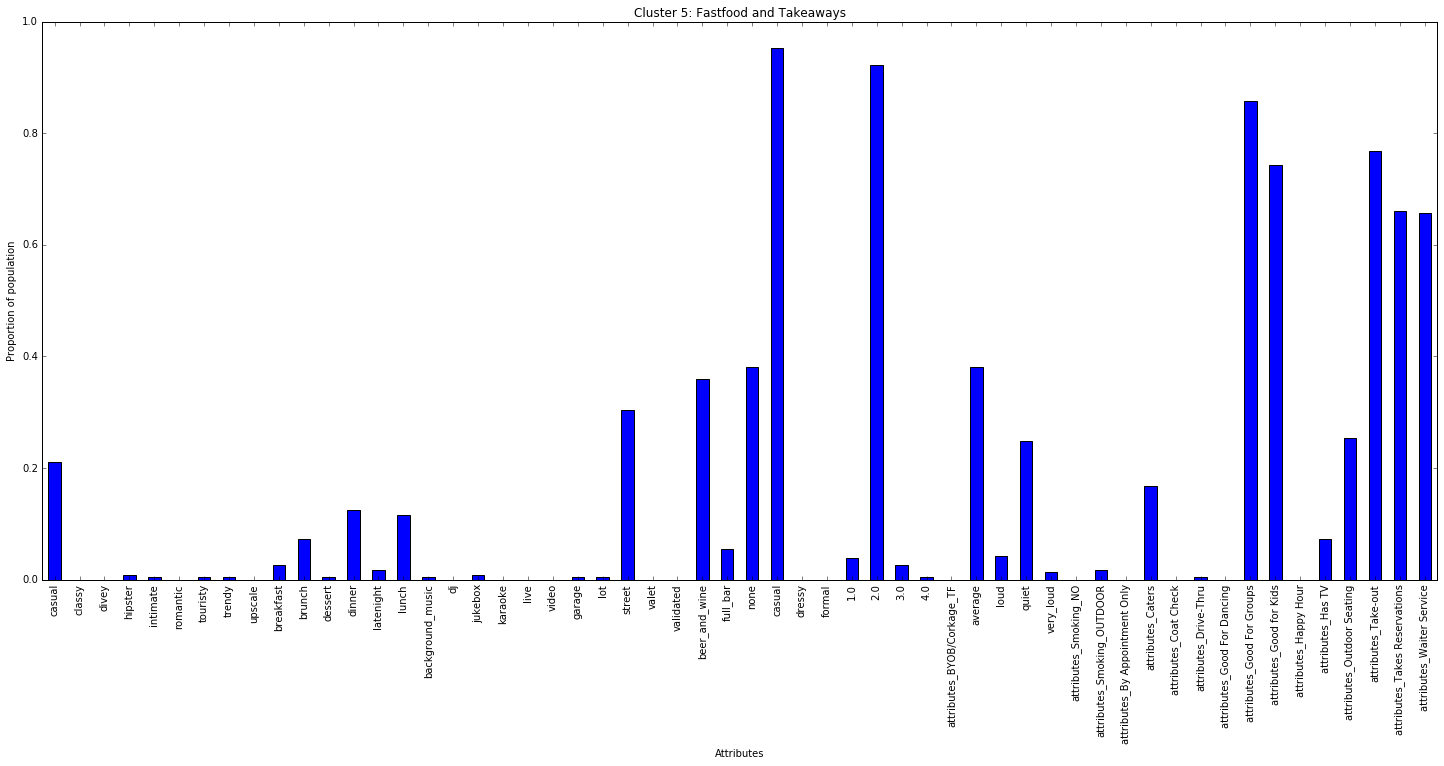

In [213]:
plt.show()
plt.figure(figsize=(25, 10))
plt.title('Cluster 5: Average Restaurants')
plt.xlabel('Attributes')
plt.ylabel('Proportion of population')
C5.ix[1,0:56].plot(kind='bar',ylim=[0,1])
df3_filtered[df3_filtered.cluster==5]

Cluster 5 contains 233 restaurants. They are mainly general restaurants, providing brunch, dinner and lunch. 
They are less quiet but not the noisiest type. 
This restaurants are not very stylish and almost none of them provide any music.
They are generally group and kids friendly.

Below is the data set containing all the restaurants with at least one attribute, all labeled with clusters.

In [200]:
df3_filtered
df3_filtered["zip"]=df2["zip"]
df3_filtered.to_csv("C:/Users/cheukkin.Warwick/Desktop/dm_group/d3_filtered.csv")

Now we can visualise the distribution of different types of restaurants in different zips and analyse the supply of different kind of restaurants. 

In [220]:
from __future__ import division
df3_filtered["Type"]=df3_filtered.cluster
df3_filtered.Type=df3_filtered.Type.map({1:"Unknown", 2:"Classy",3:"stylish and Pubs & Bars",4:"Fastfood & Takeaways",5:"General"})
supply=pd.crosstab(df3_filtered["Type"],df3_filtered["zip"]).apply(lambda r: r*100/r.sum(), axis=1)
supply

zip,EH1,EH10,EH11,EH12,EH13,EH14,EH15,EH16,EH17,EH2,EH3,EH4,EH5,EH6,EH7,EH8,EH9
Type,,,,,,,,,,,,,,,,,
Classy,35.593220,3.389831,2.542373,1.694915,0.00000,0.000000,0.847458,1.694915,0.00000,16.949153,13.559322,0.847458,0.847458,10.169492,2.542373,5.084746,4.237288
Fastfood & Takeaways,22.807018,5.847953,3.508772,2.339181,0.00000,0.584795,1.754386,1.169591,0.00000,7.017544,9.941520,1.754386,0.000000,7.602339,4.093567,24.561404,7.017544
General,18.025751,7.296137,7.296137,3.433476,0.00000,0.000000,0.858369,0.858369,0.00000,8.583691,16.738197,1.716738,0.000000,8.154506,6.437768,15.879828,4.721030
Unknown,19.633508,4.188482,6.020942,4.973822,1.04712,1.308901,2.617801,1.570681,0.26178,9.424084,18.062827,4.188482,0.261780,8.115183,6.020942,9.162304,3.141361
stylish and Pubs & Bars,25.889968,5.177994,2.588997,1.941748,0.00000,0.000000,1.294498,0.970874,0.00000,19.417476,16.181230,2.588997,0.323625,9.385113,3.236246,9.061489,1.941748


Similarly, we can look at the the distribution of top rating review for each restaurant types in different zips and use it as a proxy of popular zip for different kinds of restaurants.

In [233]:
review=pd.read_csv("C:/Users/cheukkin.Warwick/Desktop/dm_group/final_group_project/Kane Wu/edinReview.csv",header=0)
review=review.merge(df3_filtered, on=['business_id'], how='outer')
review_stars=review[((review.stars==4) == True) | ((review.stars==5) == True)]
demand=pd.crosstab(review_stars["Type"],review_stars["zip"]).apply(lambda r: r*100/r.sum(), axis=1)
demand

zip,EH1,EH10,EH11,EH12,EH13,EH14,EH15,EH16,EH2,EH3,EH4,EH5,EH6,EH7,EH8,EH9
Type,,,,,,,,,,,,,,,,
Classy,41.897941,1.432408,1.253357,0.716204,0.000000,0.000000,0.000000,0.537153,21.038496,11.369740,0.447628,0.089526,9.579230,3.133393,6.087735,2.417189
Fastfood & Takeaways,39.736685,4.488330,2.094554,0.837822,0.000000,0.059844,1.017355,0.299222,4.368642,9.994016,0.718133,0.000000,5.745063,4.608019,23.279473,2.752843
General,23.131673,5.693950,4.137011,1.334520,0.000000,0.000000,0.355872,0.088968,12.188612,19.928826,0.711744,0.000000,4.937722,6.138790,16.681495,4.670819
Unknown,21.522843,6.192893,4.771574,3.756345,0.406091,1.015228,2.538071,0.812183,11.472081,17.868020,3.857868,0.000000,6.192893,5.279188,12.081218,2.233503
stylish and Pubs & Bars,36.550000,3.075000,1.550000,0.725000,0.000000,0.000000,1.075000,0.425000,20.250000,12.675000,0.725000,0.200000,7.900000,2.500000,11.050000,1.300000


By from the above, we can then calculate the ratio of restaurants receiving top reiviews. For instance, fastfood and takeaways in EH1 receives 39.7% of top reviews in the Fastfood & Takeaways category with only 22.8% of Fastfood & Takeaways in located in the zip. It therefore implies the quality of Fastfood & Takeaways are generally more satisfying than those located in other zip.

We can create a ratio as an indicator of high quality region as an indicator of out-performing region.

(%top review - %restaurants)/%restaurants 


In [235]:
(demand-supply)/supply

zip,EH1,EH10,EH11,EH12,EH13,EH14,EH15,EH16,EH17,EH2,EH3,EH4,EH5,EH6,EH7,EH8,EH9
Type,,,,,,,,,,,,,,,,,
Classy,0.177133,-0.577440,-0.507013,-0.577440,NaN,NaN,-1.000000,-0.683080,NaN,0.241271,-0.161482,-0.471799,-0.89436,-0.058042,0.232468,0.197255,-0.429543
Fastfood & Takeaways,0.742301,-0.232496,-0.403052,-0.641831,NaN,-0.897666,-0.420108,-0.744165,NaN,-0.377469,0.005280,-0.590664,NaN,-0.244303,0.125673,-0.052193,-0.607720
General,0.283257,-0.219594,-0.432986,-0.611321,NaN,NaN,-0.585409,-0.896352,NaN,0.419973,0.190620,-0.585409,NaN,-0.394479,-0.046441,0.050483,-0.010636
Unknown,0.096230,0.478553,-0.207504,-0.244777,-0.612183,-0.224365,-0.030457,-0.482910,NaN,0.217315,-0.010785,-0.078934,-1.00000,-0.236876,-0.123196,0.318579,-0.289002
stylish and Pubs & Bars,0.411744,-0.406141,-0.401312,-0.626625,NaN,NaN,-0.169563,-0.562250,NaN,0.042875,-0.216685,-0.719969,-0.38200,-0.158241,-0.227500,0.219446,-0.330500


From the calculation above, we can make a conclude that:

Out-performing regions:

Classy: EH2, EH7, EH8, EH1 
Fastfood & Takeaways: EH1, EH7, EH3
General: EH2, EH1, EH3, EH8
Stylish and Pubs & Bars: EH1, EH8, EH2

Under-performing regions:

Classy: EH5, EH10, EH12, EH11 
Fastfood & Takeaways: EH14, EH16, EH12, EH14, EH6
General: EH12, EH16, EH15, EH4
Stylish and Pubs & Bars: EH10, EH11, EH5, EH3

For a strategic purpose, we may want to consider the net difference between top rating reviews and number of restaurants.

In [236]:
demand-supply

zip,EH1,EH10,EH11,EH12,EH13,EH14,EH15,EH16,EH17,EH2,EH3,EH4,EH5,EH6,EH7,EH8,EH9
Type,,,,,,,,,,,,,,,,,
Classy,6.304721,-1.957422,-1.289016,-0.978711,0.000000,0.000000,-0.847458,-1.157762,NaN,4.089343,-2.189582,-0.399830,-0.757932,-0.590261,0.591020,1.002989,-1.820099
Fastfood & Takeaways,16.929667,-1.359623,-1.414218,-1.501360,0.000000,-0.524951,-0.737031,-0.870369,NaN,-2.648902,0.052495,-1.036253,0.000000,-1.857276,0.514452,-1.281930,-4.264701
General,5.105922,-1.602187,-3.159127,-2.098957,0.000000,0.000000,-0.502497,-0.769401,NaN,3.604921,3.190628,-1.004994,0.000000,-3.216784,-0.298978,0.801666,-0.050212
Unknown,1.889335,2.004412,-1.249369,-1.217477,-0.641029,-0.293672,-0.079730,-0.758498,NaN,2.047997,-0.194807,-0.330614,-0.261780,-1.922290,-0.741755,2.918915,-0.907859
stylish and Pubs & Bars,10.660032,-2.102994,-1.038997,-1.216748,0.000000,0.000000,-0.219498,-0.545874,NaN,0.832524,-3.506230,-1.863997,-0.123625,-1.485113,-0.736246,1.988511,-0.641748


Now, depends on the estimated quality of our service, we can make strategic consideration based on the the results above. 

If we want to open a restaurant to provide a average level of services, we should locate our restaurant at a zip with high percentage of reviews but under-performing reviews to avoid competition with top quality restaurants and take up those unsatisfied demand in the zip. Also, as these areas are generally less popular, the rents are also generally lower and therefore the cost and potential risk will be lower.

Classy: EH10
Fastfood & Takeaways: EH9
General:EH6
Stylish and Pubs & Bars: EH4

If we want to open a top quality restaurants, we should locate our restaurant at a zip with high out-performing ratio so that we can save our advertising cost and take advantage of the popularity of the location.

Classy: EH2
Fastfood & Takeaways: EH1
General: EH2
Stylish and Pubs & Bars: EH1